
# Análise dos Resultados da Clusterização com a Grande Base 4

**Objetivo**: Encontrar resultados relevantes a partir da análise da grande base 4. 

---

## Imports + Loading Dataframe
------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('https://github.com/ieee-uerj/capes-data-analysis/raw/main/data/Grande_Base_4.csv' , encoding='latin1')

#carregando o dataset direto do github

In [3]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Tratando os Dados antes de Clusterizar 
---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CD_PROGRAMA_IES                   20141 non-null  object 
 1   AN_BASE                           20141 non-null  int64  
 2   CD_AREA_AVALIACAO                 20141 non-null  int64  
 3   IB_Total_docentes                 20141 non-null  int64  
 4   IB_Mulheres                       20141 non-null  int64  
 5   IB_Homens                         20141 non-null  int64  
 6   IB_Brasileiros                    20141 non-null  int64  
 7   IB_Estrangeiros                   20141 non-null  int64  
 8   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 9   IB_QTDE_Regime_Integral           20141 non-null  int64  
 10  IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 11  IB_QTDE_Prof_Doutor               20141 non-null  int64  
 12  IB_Q

In [6]:
x=df.iloc[:,np.r_[3:21,24:25,27:29,30:40,42,46:55]]

#Repartindo o dataset por indice sem as colunas com dados categóricos, codigos ou indices. 

In [7]:
x.info()
#Verificando o resultado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IB_Total_docentes                 20141 non-null  int64  
 1   IB_Mulheres                       20141 non-null  int64  
 2   IB_Homens                         20141 non-null  int64  
 3   IB_Brasileiros                    20141 non-null  int64  
 4   IB_Estrangeiros                   20141 non-null  int64  
 5   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 6   IB_QTDE_Regime_Integral           20141 non-null  int64  
 7   IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 8   IB_QTDE_Prof_Doutor               20141 non-null  int64  
 9   IB_QTDE_Prof_NaoDoutor            20141 non-null  int64  
 10  IB_QTDE_titulados_Brasil          20141 non-null  int64  
 11  IB_QTDE_titulados_Exterior        20141 non-null  int64  
 12  IB_P

In [13]:
def ondenulo(lista):
    count = 0 
    for i in xnull: 
        if i == True: 
            print(i, count)
            break
        else:
            count+=1
        
#Verificando qual linha da coluna contem o dado nulo. 

In [14]:
xnull = x['QT_MES_TITULACAO'].isnull()
ondenulo(xnull)

True 17317


In [16]:
x['QT_MES_TITULACAO'].iloc[17317] = x['QT_MES_TITULACAO'].mean()

#Substituindo o unico valor nulo pela média dos valores encontrados na coluna. 

In [18]:
xnull2 = x['GUS_Dis_Aluno_Tempo'].isnull()
ondenulo(xnull2)

True 17317


In [19]:
x['GUS_Dis_Aluno_Tempo'].iloc[17317] = x['GUS_Dis_Aluno_Tempo'].mean()

# Substituindo o único valor nulo pela média dos valores da coluna. 

In [20]:
x.info()
# Verificando que se não há mais dados nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IB_Total_docentes                 20141 non-null  int64  
 1   IB_Mulheres                       20141 non-null  int64  
 2   IB_Homens                         20141 non-null  int64  
 3   IB_Brasileiros                    20141 non-null  int64  
 4   IB_Estrangeiros                   20141 non-null  int64  
 5   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 6   IB_QTDE_Regime_Integral           20141 non-null  int64  
 7   IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 8   IB_QTDE_Prof_Doutor               20141 non-null  int64  
 9   IB_QTDE_Prof_NaoDoutor            20141 non-null  int64  
 10  IB_QTDE_titulados_Brasil          20141 non-null  int64  
 11  IB_QTDE_titulados_Exterior        20141 non-null  int64  
 12  IB_P

## Clusterização - Kmeans
---

In [21]:
scaler = StandardScaler().fit(x)
x=scaler.transform(x)

In [27]:
modelo=KMeans(n_clusters=5, random_state=0)
pred = modelo.fit_predict(x)
df['Cluster'] = pred
#centroides= modelo.cluster_centers_

In [28]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
df2 = df[df.Cluster==2]
df3 = df[df.Cluster==3]
df4 = df[df.Cluster==4]

## Análise dos 'Clusteres'
---

In [153]:
df0.columns

Index(['CD_PROGRAMA_IES', 'AN_BASE', 'CD_AREA_AVALIACAO', 'IB_Total_docentes', 'IB_Mulheres', 'IB_Homens', 'IB_Brasileiros', 'IB_Estrangeiros', 'IB_QTDE_Regime_Parcial', 'IB_QTDE_Regime_Integral', 'IB_QTDE_Regime_Exclusivo', 'IB_QTDE_Prof_Doutor', 'IB_QTDE_Prof_NaoDoutor', 'IB_QTDE_titulados_Brasil', 'IB_QTDE_titulados_Exterior', 'IB_Profs_Colaboradores', 'IB_Profs_ServidoresPublicos', 'IB_Profs_VinculoCLT', 'IB_Profs_Aposentados', 'IB_Profs_BolsaDeFixacao', 'IB_Total_cursos', 'MEDIA_CONCEITO_CURSO', 'ID_SUBTIPO_PRODUCAO', 'NM_SUBTIPO_PRODUCAO', 'IN_TRABALHO_MESMA_AREA', 'NR_PAGINAS', 'GUS_Lingua_estrangeira', 'GUS_Quantidade_Trabalhos', 'AN_NASCIMENTO_DOCENTE', 'SG_ENTIDADE_ENSINO', 'GUS_Dis_Homens', 'GUS_Dis_Mulheres', 'GUS_Dis_Brasileiros', 'GUS_Dis_Estrangeiros', 'GUS_diferenca_idade', 'GUS_razao_aluno_prof', 'GUS_Quantidade_Discentes', 'GUS_Dis_Prop_Homens', 'GUS_Dis_Aluno_Tempo', 'QT_MES_TITULACAO', 'GUS_pag_por_aluno', 'CS_STATUS_JURIDICO', 'AN_NASCIMENTO_DISCENTE',
       'NM_R

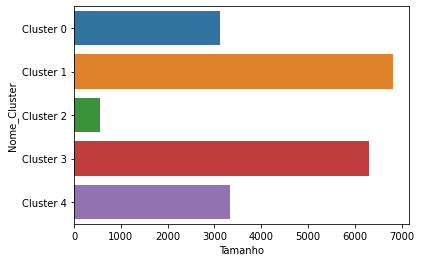

In [371]:
"""Verificando o tamanho de cada cluster"""

size = {'Nome_Cluster': ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'], 
        'Tamanho': [df0.shape[0], df1.shape[0],df2.shape[0],df3.shape[0],df4.shape[0]]}

dfsize = pd.DataFrame(data=size)
ax = sns.barplot(data=dfsize, x = 'Tamanho', y = 'Nome_Cluster')

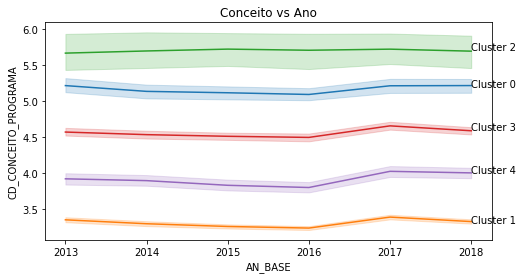

In [130]:
"""Verificando se o conceito variou ao longo dos anos"""

plt.figure(figsize=(8,4))
plt.title('Conceito vs Ano')
plt.annotate(text='Cluster 0', xy=(2018,5.20))
plt.annotate(text='Cluster 1', xy=(2018,3.3))
plt.annotate(text='Cluster 2', xy=(2018,5.7))
plt.annotate(text='Cluster 3', xy=(2018,4.6))
plt.annotate(text='Cluster 4', xy=(2018,4))
ax = sns.lineplot(y="CD_CONCEITO_PROGRAMA", x="AN_BASE",  data=df0)
ax1 = sns.lineplot(y="CD_CONCEITO_PROGRAMA", x="AN_BASE", data=df1)
ax2 = sns.lineplot(y="CD_CONCEITO_PROGRAMA", x="AN_BASE", data=df2)
ax3 = sns.lineplot(y="CD_CONCEITO_PROGRAMA", x="AN_BASE", data=df3)
ax4 = sns.lineplot(y="CD_CONCEITO_PROGRAMA", x="AN_BASE", data=df4)

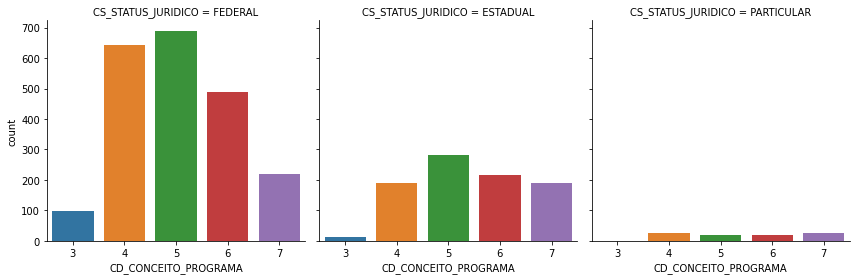

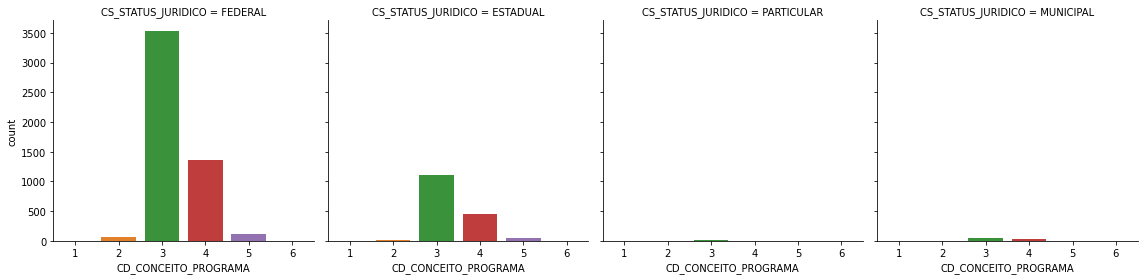

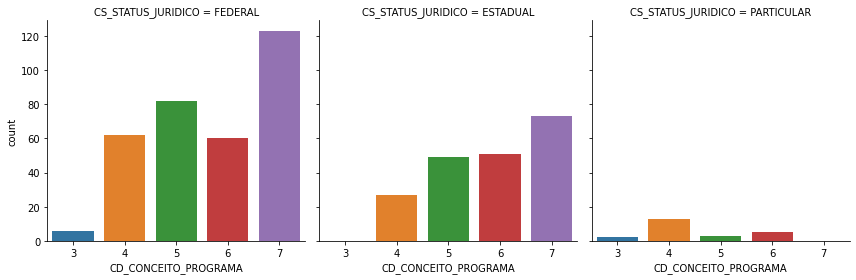

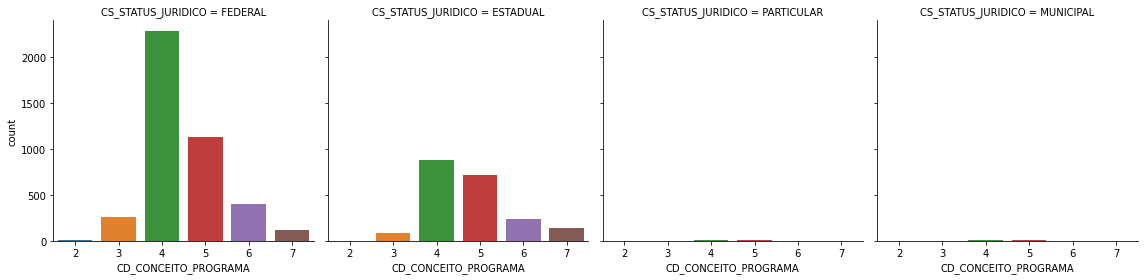

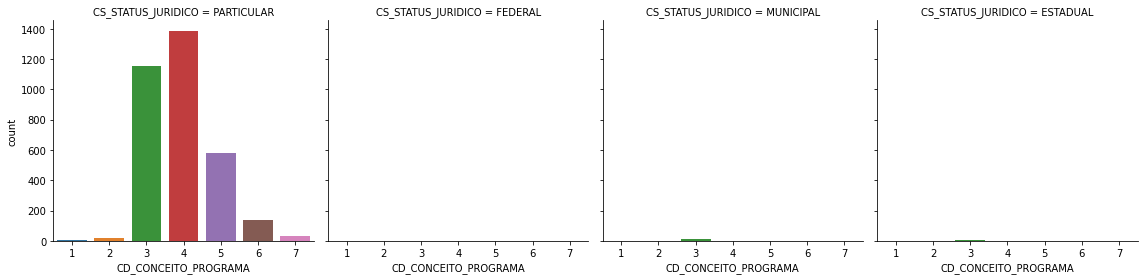

In [324]:
""" Verificando a distribuição de conceito por região de cada cluster"""
dfs = [df0, df1, df2, df3, df4]
for i in dfs:
    sns.catplot(data=i,x='CD_CONCEITO_PROGRAMA', col='CS_STATUS_JURIDICO', kind='count', height = 4, aspect=1)

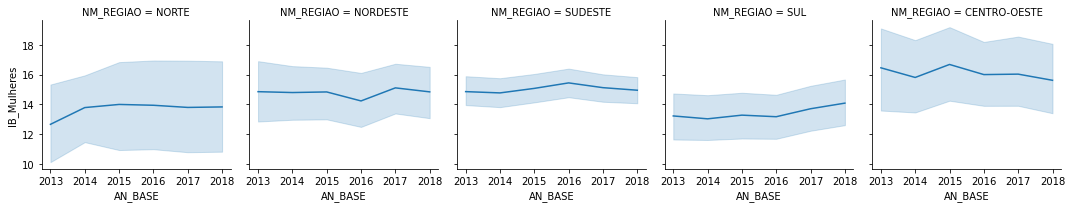

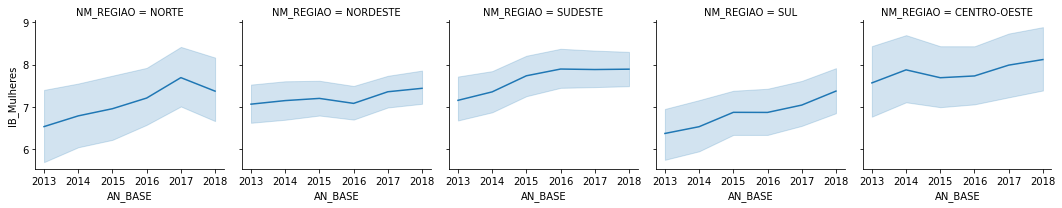

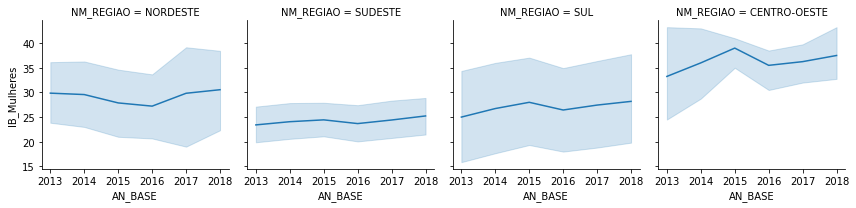

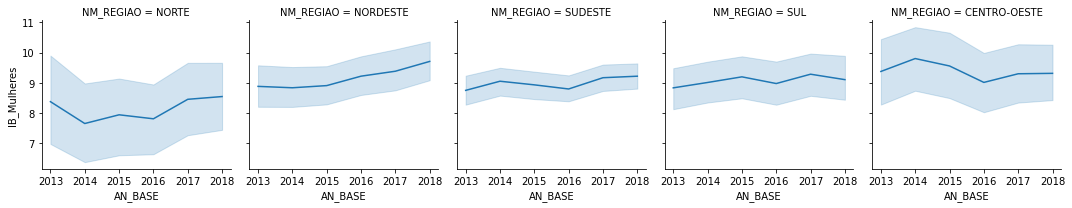

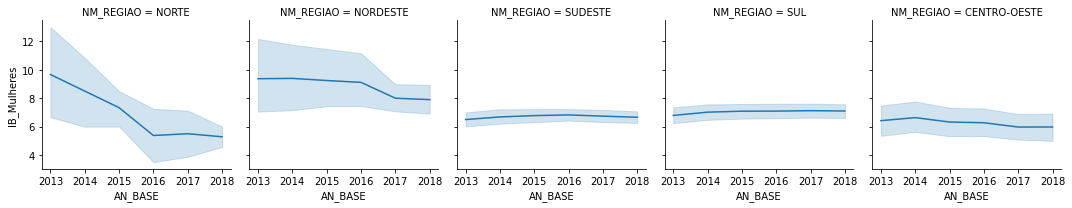

In [264]:
for i in dfs:
    ax = sns.FacetGrid(i,col = "NM_REGIAO")
    ax.map(sns.lineplot, "AN_BASE", "IB_Mulheres")

#### Observação: 

* Na região norte do cluster 0,1 e 3 podemos ver um comportamento ascendente da quantidade de mulheres, já no cluster 4 há uma queda na quantidade de mulheres ao longo dos anos.

**Hipotese: Será que essa queda impacta no conceito?** 

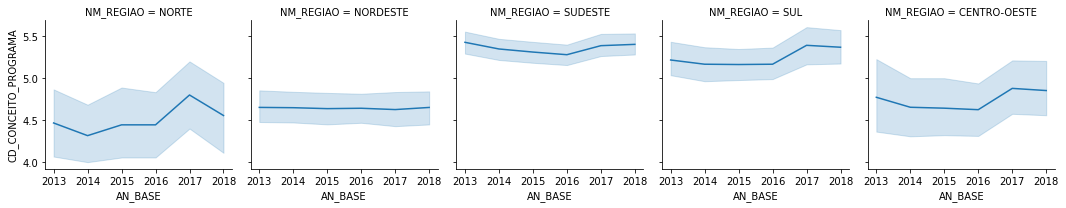

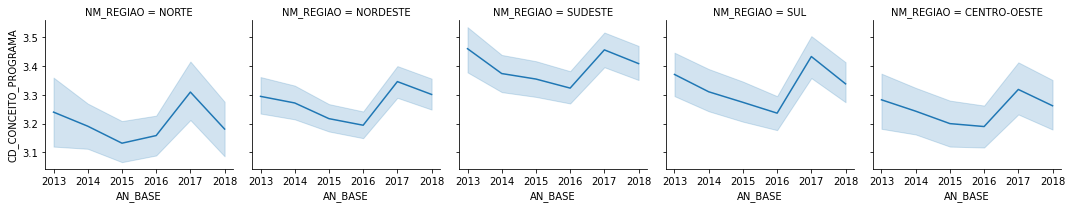

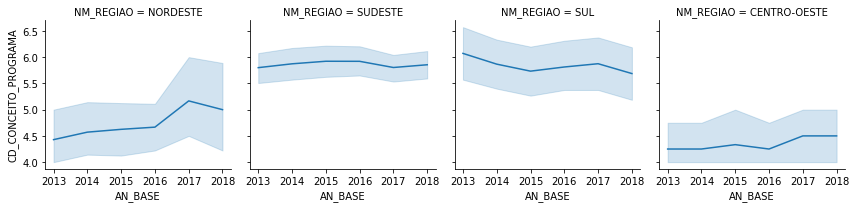

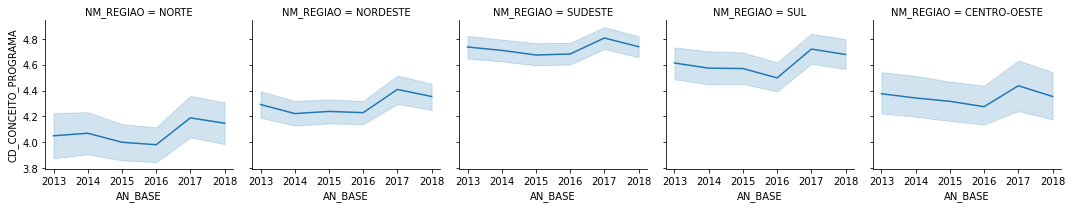

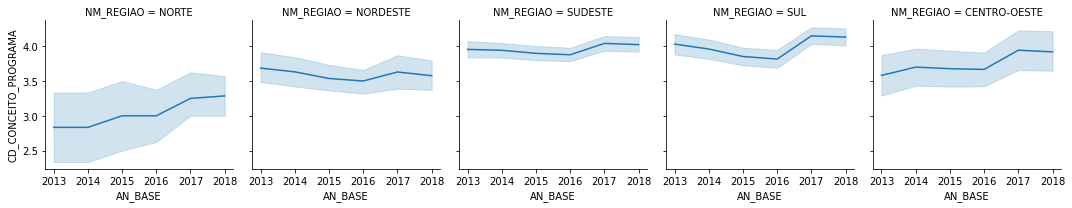

In [259]:
"""Conceito por ano de cada regiao e de cada cluster"""
for i in dfs:
    ax = sns.FacetGrid(i, col = "NM_REGIAO")
    ax.map(sns.lineplot, "AN_BASE", "CD_CONCEITO_PROGRAMA")

In [227]:
"""Printei as colunas de uma forma que eu conseguisse visualizar e selecionar as que eu iria analisar na próxima célula"""
j = 0
for i in df0.columns:
        print(f'{j} - {i}', end= ';  ')
        j += 1

0 - CD_PROGRAMA_IES;  1 - AN_BASE;  2 - CD_AREA_AVALIACAO;  3 - IB_Total_docentes;  4 - IB_Mulheres;  5 - IB_Homens;  6 - IB_Brasileiros;  7 - IB_Estrangeiros;  8 - IB_QTDE_Regime_Parcial;  9 - IB_QTDE_Regime_Integral;  10 - IB_QTDE_Regime_Exclusivo;  11 - IB_QTDE_Prof_Doutor;  12 - IB_QTDE_Prof_NaoDoutor;  13 - IB_QTDE_titulados_Brasil;  14 - IB_QTDE_titulados_Exterior;  15 - IB_Profs_Colaboradores;  16 - IB_Profs_ServidoresPublicos;  17 - IB_Profs_VinculoCLT;  18 - IB_Profs_Aposentados;  19 - IB_Profs_BolsaDeFixacao;  20 - IB_Total_cursos;  21 - MEDIA_CONCEITO_CURSO;  22 - ID_SUBTIPO_PRODUCAO;  23 - NM_SUBTIPO_PRODUCAO;  24 - IN_TRABALHO_MESMA_AREA;  25 - NR_PAGINAS;  26 - GUS_Lingua_estrangeira;  27 - GUS_Quantidade_Trabalhos;  28 - AN_NASCIMENTO_DOCENTE;  29 - SG_ENTIDADE_ENSINO;  30 - GUS_Dis_Homens;  31 - GUS_Dis_Mulheres;  32 - GUS_Dis_Brasileiros;  33 - GUS_Dis_Estrangeiros;  34 - GUS_diferenca_idade;  35 - GUS_razao_aluno_prof;  36 - GUS_Quantidade_Discentes;  37 - GUS_Dis_Pro

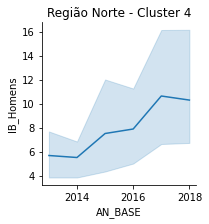

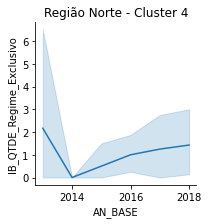

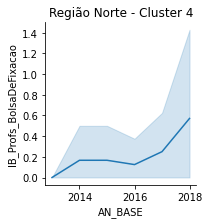

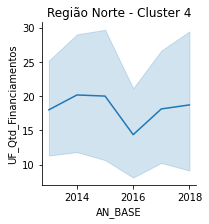

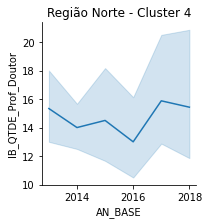

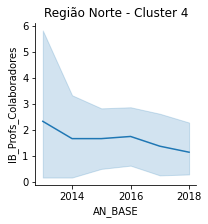

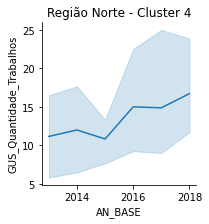

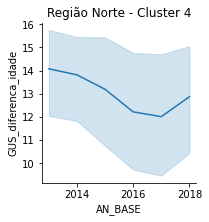

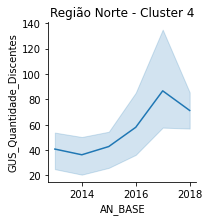

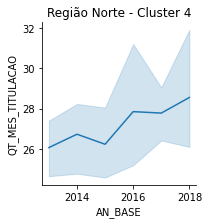

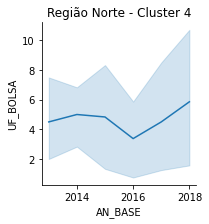

In [285]:
"""Investigando os outros atributos, mas somente do cluster 4 e na Região Norte"""

#conjunto de variaveis selecionadas para investigar o comportamento
variaveis = ['IB_Homens', 'IB_QTDE_Regime_Exclusivo', 'IB_Profs_BolsaDeFixacao', 'UF_Qtd_Financiamentos', 
             'IB_QTDE_Prof_Doutor', 'IB_Profs_Colaboradores', 'GUS_Quantidade_Trabalhos', 
             'GUS_diferenca_idade', 'GUS_Quantidade_Discentes', 'QT_MES_TITULACAO', 'UF_BOLSA'] 

dfNorte = df4.query("NM_REGIAO == 'NORTE'")  # Filtrando somente a região norte 

"""Laço para printar as variáveis por ano"""
for i in variaveis:
    ax = sns.FacetGrid(dfNorte)
    ax.map(sns.lineplot, "AN_BASE", i, sizes=(12,8))
    plt.title('Região Norte - Cluster 4')
    

#### Observações:


**A medida em que a quantidade de mulheres diminuiu e o conceito subiu, também acorreu que:**

* A quantidade de Homens subiu. 
* A quantidade de professores em Regime exclusivo subiu.
* A quantidade de Bolsas de Fixação Subiu. 
* A quantidade de Professores colaboradores diminiu.
* A diferença de idade entre aluno e professor diminui.
* A quantidade de trabalhos publicados subiu. 
* A quantidade de Discentes nos projetos subiu


**Hipóteses:**

* O aumento da nota nesse cluster nessa região ocorreu devido, principalmente, ao aumento do número de Bolsas de fixação e de professores em regime exclusivo. Com o aumento de professores em regime exclusivo, temos um maior tempo de dedicação à pesquisa como pode ser observado com o aumento do volume de trabalhos publicados. Já com o aumento do número de Bolsas temos mais recursos o que pode ser evidenciado pelo crescimento do número de discentes. 


* A diminiuição de idade entre o aluno e professor sugere a entrada de mais professores com menos idade novos. 